In [51]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [52]:
# read the data
df = pd.read_csv('disappeared_children_dirty_data.csv')

# shape and data types of the data
print(df.shape)
print(df.dtypes)

# select numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

# select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

(329, 12)
Unnamed: 0            int64
Label                object
Year Disappeared     object
Year Born            object
Resolved            float64
Type                 object
Mother's Name        object
Father's Name        object
Mother's Status      object
Father's Status      object
Extra Info           object
URL                  object
dtype: object
['Unnamed: 0' 'Resolved']
['Label' 'Year Disappeared' 'Year Born' 'Type' "Mother's Name"
 "Father's Name" "Mother's Status" "Father's Status" 'Extra Info' 'URL']


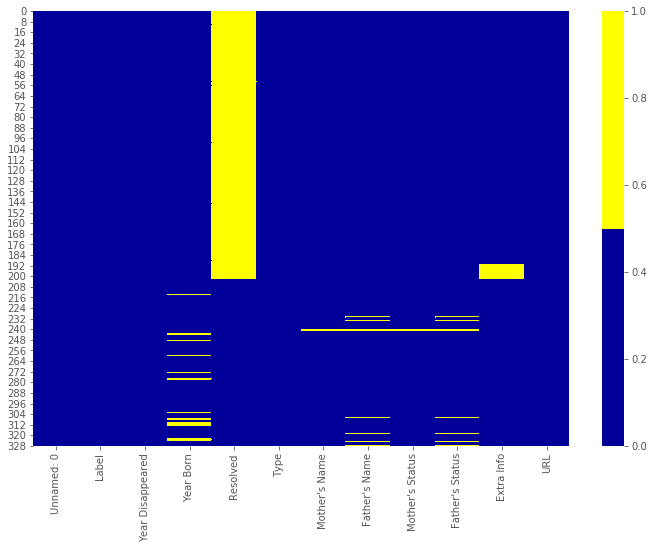

In [53]:
cols = df.columns # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [54]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0.0%
Label - 0.0%
Year Disappeared - 0.0%
Year Born - 4.0%
Resolved - 62.0%
Type - 0.0%
Mother's Name - 0.0%
Father's Name - 2.0%
Mother's Status - 0.0%
Father's Status - 2.0%
Extra Info - 3.0%
URL - 0.0%


In [55]:
df.head()

,Unnamed: 0,Label,Year Disappeared,Year Born,Resolved,Type,Mother's Name,Father's Name,Mother's Status,Father's Status,Extra Info,URL
0,0,ORZAOCOA - GÓMEZ,"DisappearedMarch 21th, 1975",1975,NaN,Born in Captivity,María de las Mercedes GÓMEZ,Carlos Normando ORZAOCOA,"DisappearedMarch 21th, 1975",Not disappeared\n,['\n\n'],https://abuelas.org.ar//idiomas/english/cases/...
1,1,VIVANCO - ABDALA,"DisappearedJuly 25th, 1975",1975,NaN,Born in Captivity,Lilia Nora ABDALA,José Alejandro VIVANCO,"DisappearedJuly 25th, 1975","Disappeared July 25th, 1975",['\n\n'],https://abuelas.org.ar//idiomas/english/cases/...
2,2,JEGER - GONZÁLEZ,"DisappearedJuly 8th, 1975",1975,NaN,Born in Captivity,Olga Cristina GONZÁLEZ,Maurice JEGER,"DisappearedJuly 8th, 1975","Disappeared July 8th, 1975",['\n\n'],https://abuelas.org.ar//idiomas/english/cases/...
3,3,FORNIES - FARIÑAS,"DisappearedJune 14th, 1975",1975,NaN,Born in Captivity,Beatriz FARIÑAS,Hugo Enrique FORNIES,"DisappearedJune 14th, 1975","Disappeared June 14th, 1975",['\n\n'],https://abuelas.org.ar//idiomas/english/cases/...
4,4,CHERTKOFF,"DisappearedAugust 25th, 1975",1976,NaN,Born in Captivity,Mónica Roxana CHERTKOFF,,"DisappearedAugust 25th, 1975",,['\n\n'],https://abuelas.org.ar//idiomas/english/cases/...


In [56]:
df[0:1]

,Unnamed: 0,Label,Year Disappeared,Year Born,Resolved,Type,Mother's Name,Father's Name,Mother's Status,Father's Status,Extra Info,URL
0,0,ORZAOCOA - GÓMEZ,"DisappearedMarch 21th, 1975",1975,NaN,Born in Captivity,María de las Mercedes GÓMEZ,Carlos Normando ORZAOCOA,"DisappearedMarch 21th, 1975",Not disappeared\n,['\n\n'],https://abuelas.org.ar//idiomas/english/cases/...


In [57]:
df.columns

Index(['Unnamed: 0', 'Label', 'Year Disappeared', 'Year Born', 'Resolved',
       'Type', 'Mother's Name', 'Father's Name', 'Mother's Status',
       'Father's Status', 'Extra Info', 'URL'],
      dtype='object')

In [111]:
#adding new columns to store year only and full date
df["Year Dis"] = "NA"

In [113]:
for i in range(df.shape[0]):
    dirty_val = df["Year Disappeared"][i]
    year = ''
    for ch in dirty_val:
        if len(year) < 4:
            if ch.isnumeric():
                year+=ch
            else:
                year=''
        else:
            break
    if year:
        df["Year Dis"][i] = int(year)
    else:
        df["Year Dis"][i] = np.NaN

In [122]:
df["Yr Born"] = "NA"

In [152]:
for i in range(df.shape[0]):
    dirty_val = df["Year Born"][i]
    if dirty_val:
        if type(dirty_val) == float:
            dirty_val = ""
        year = ''
        for ch in dirty_val:
            if len(year) < 4:
                if ch.isnumeric():
                    year+=ch
                else:
                    year=''
            else:
                break
        if year:
            df["Yr Born"][i] = int(year)
        else:
            df["Yr Born"][i] = np.NaN
    else:
        df["Yr Born"][i] = np.NaN

In [170]:
# for i in range(df.shape[0]):
#     print(df.Resolved[i] == np.nan)

In [135]:
type(1) == float

False

In [150]:
float("nan")

nan